In [10]:
import numpy as np
import pandas as pd
from edempy import Deck
from extrapolation import extrapolation
from LaceyClass import LaceyMixingAnalyzer
import matplotlib.pyplot as plt
from rnn.data_loader_rnn import RNNLoader
from rnn.rnn_extrap import plot_particles, import_dict
import matplotlib.pyplot as plt


sim_names = ["Rot_drum_mono", "Rot_drum_binary_mixed", "Rot_drum_400k"]
sim_name = sim_names[-1]
sim_path =rf"V:\GrNN_EDEM-Sims\{sim_name}.dem"

In [2]:
#simulation parameters
start_t = 1
end_t = 20
domain_x = (-0.07, 0.07)       
domain_y = (-0.025, 0.025)
domain_z = (-0.07, 0.03)
num_bins = 10
direction = "y"

extrap = extrapolation(start_t, end_t, sim_path, domain_x, domain_y, domain_z, num_bins, direction)

In [3]:
lacey_settings = f"{sim_path[:-4]}_data\Export_Data\Lacey_settings.txt"

with open(lacey_settings, 'r') as file:
    preferences = file.readlines()
    minCoords = np.array([float(i) for i in str(preferences[1]).split(',')])
    maxCoords = np.array([float(i) for i in str(preferences[3]).split(',')])
    bins = np.array([int(i) for i in str(preferences[5]).split(',')])
    cut_off = int(preferences[7])
    plot = str(preferences[9])
    file.close()
    settings = True

801


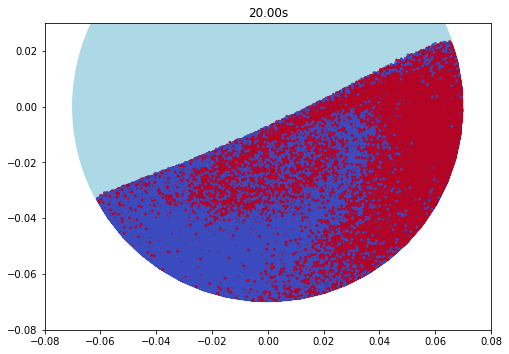

In [4]:
id_dict_path = rf"V:\GrNN_EDEM-Sims\{sim_name}_data\Export_Data"
id_dict = import_dict(id_dict_path, "id_dict")

t1 = 20

t1_index = extrap.find_nearest(extrap.deck.timestepValues, t1)
print(t1_index)
t1_data = extrap.get_particle_coords(t1_index)

id_dict = import_dict(id_dict_path, "id_dict")
plot_particles(t1_data, id_dict, True, t1)

z_max = np.amax(t1_data[:, 2])


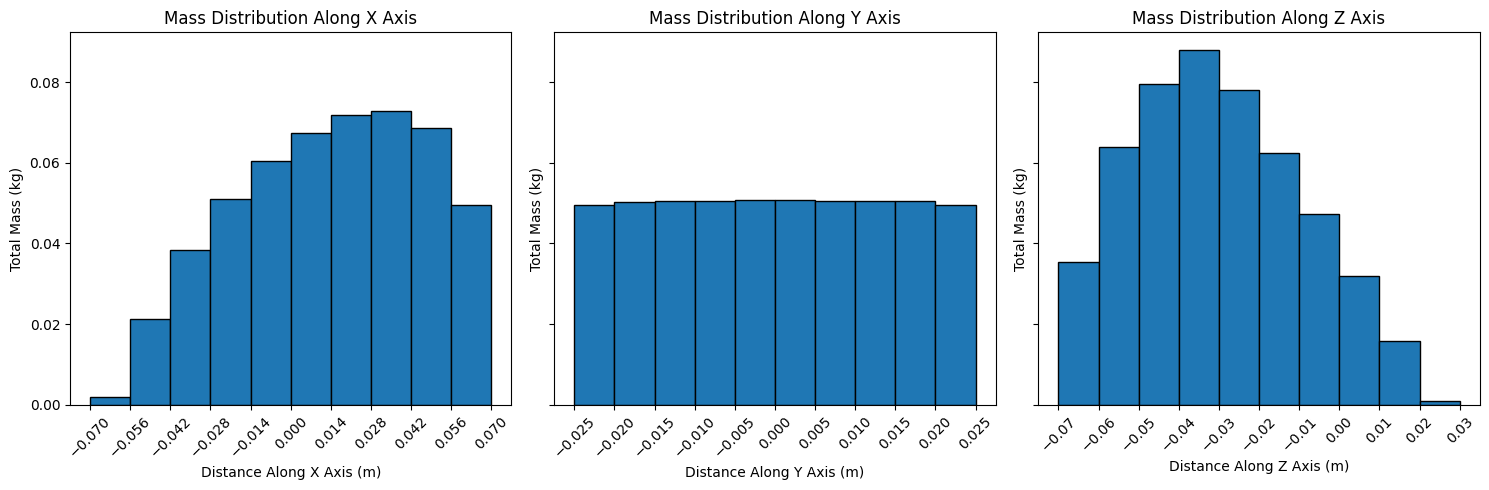

In [65]:
direction = "y"
bin_count = 10
domain_z = (-0.07, 0.03)

domains = {
    "x": domain_x,
    "y": domain_y,
    "z": domain_z
}

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=1, dpi=100)

# Iterate over each direction
for i, direction in enumerate(domains.keys()):
    bin_length = (domains[direction][1] - domains[direction][0]) / bin_count

    # Generate bin edges
    bins = np.linspace(domains[direction][0], domains[direction][1], bin_count + 1)

    slices = extrap.slice_positions_1d(t1_data, domains[direction], bin_count, direction)

    masses = []

    for slice in slices:
        total_mass = np.sum(slice[:, 3])
        masses.append(total_mass)

    # Plotting the histogram with y-values as masses on the current subplot
    axs[i].bar(bins[:-1], masses, width=np.diff(bins), edgecolor="k", align="edge")

    # Adding labels and title to the current subplot
    axs[i].set_xlabel(f'Distance Along {direction.capitalize()} Axis (m)')
    axs[i].set_ylabel('Total Mass (kg)')
    axs[i].set_title(f'Mass Distribution Along {direction.capitalize()} Axis')
    axs[i].set_xticks(bins)
    axs[i].tick_params(axis='x', rotation=45)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()